In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation, preprocessing, linear_model
import sklearn
sklearn.__version__

/Users/tomo/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/Users/tomo/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


'0.19.1'

In [3]:
# Housing のデータセットを読み込む
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X_rm = df[['RM']].values
X = df.iloc[:, 0:13]
Y = df['MEDV'].values

In [4]:
# データの整形
sc = preprocessing.StandardScaler()
sc.fit(X)
X = sc.transform(X)
sc.fit(X_rm)
X_rm = sc.transform(X_rm)

In [6]:
# 学習データとテストデータに分割する
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)
X_rm_train, X_rm_test, Y_train, Y_test = cross_validation.train_test_split(X_rm, Y, test_size=0.2, random_state=0)

In [8]:
# SGD Regressorを適用する
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)

clf_rm = linear_model.SGDRegressor(max_iter=1000)
clf_rm.fit(X_rm_train, Y_train)

print("全部使用した時の回帰係数")
print(clf.intercept_)
print(clf.coef_)

全部使用した時の回帰係数
[ 22.48170107]
[-1.0360691   1.05356147  0.02549889  0.59133712 -1.88122583  2.60544722
 -0.09561024 -2.90783383  2.10922602 -1.86238575 -2.2742117   0.74884248
 -3.52282454]


<function matplotlib.pyplot.show>

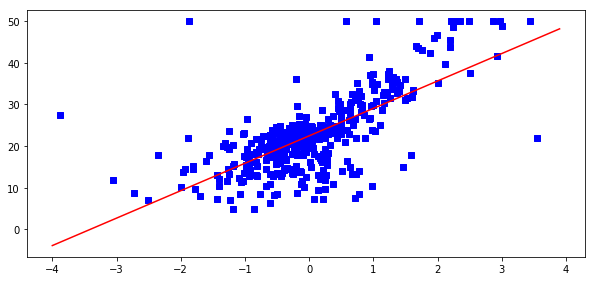

In [10]:
# 結果をプロットする
%matplotlib inline

line_X = np.arange(-4, 4, 0.1)
line_Y = clf_rm.predict(line_X[:, np.newaxis])
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(X_rm_train, Y_train, c='b', marker='s')
plt.plot(line_X, line_Y, c='r')
plt.show


「RMだけの平均2乗誤差」と「全部を使用した時の平均二乗誤差」
46.9037482764
33.7204681864


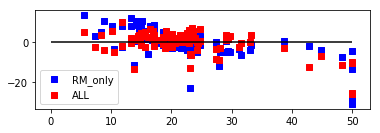

In [12]:
# 誤差をプロットする
Y_rm_pred = clf_rm.predict(X_rm_test)
plt.subplot(2,1,2)
plt.scatter(Y_test, Y_rm_pred-Y_test, c='b', marker='s', label="RM_only")

Y_pred = clf.predict(X_test)
plt.scatter(Y_test, Y_pred-Y_test, c='r', marker='s', label="ALL")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, colors='black')
plt.show

print("\n「RMだけの平均2乗誤差」と「全部を使用した時の平均二乗誤差」")
RMS = np.mean((Y_pred - Y_test) ** 2)
RMS_rm = np.mean((Y_rm_pred - Y_test) ** 2)
print(RMS_rm)
print(RMS)